# Introducción a Pandas
**Autores**: Rogelio Mazaeda Echevarría, Félix Miguel Trespaderne.

***

**Numpy** es la biblioteca Python recomendada para trabajar con vectores y matrices, **colecciones de datos del mismo tipo**, que aparecen en múltiples escenarios de la ciencia.

Sin embargo, en muchas ocasiones, se necesita trabajar simultáneamente con conjuntos de datos **relacionados** que tienen naturaleza diferente. Además, estos datos, se pueden *organizar* en un formato **tabular**. Las **columnas** de estas **tablas** están formadas por datos del mismo tipo, `float`, `str`, `int`, datos temporales, etc.

Las hojas de cálculo, como la herramienta **Excel**, los ficheros de valores separados por `,`, archivos **csv** (**c**omma **s**eparated **v**alues), o ya en otro nivel de abstracción, las **bases de datos relacionales**, son ejemplos de organización tabular.

A veces, algunas de las **celdas** de estas tablas **no tienen ningún valor**. Por ejemplo, durante la recogida de datos de un experimento, el sensor de medida no suministra esa información por la razón que fuere.

La biblioteca [**Pandas**](https://pandas.pydata.org/) está diseñada precisamente para trabajar en este escenario, poniendo a disposición del **ingeniero de datos** un vasto número de funcionalidades. Y, además, **¡gratuitas**!

**Pandas** (**Pan**el **Da**ta), junto con **Numpy**, **Scipy** y **Matplotlib**, conforman el conjunto de herramientas, dentro del *ecosistema* Python, para el desarrollo de la **Ciencia de Datos**.

En este cuaderno sólo rascamos mínimamente la superficie de las múltiples posibilidades que ofrece esta biblioteca. Las opciones de configuración de uso de la mayor parte de las funciones son enormes.
Por ejemplo, para la función `read_csv()` que veremos más abajo, tenemos estas posibilidades de invocación:
```python
pandas.read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
```

Ni [**Wes McKinney**](https://wesmckinney.com/), creador de **Pandas**, podría recordar semejante volumen de información. Por ello, tanto para **Pandas**, como **Numpy**, **Scipy** y, en general, cualquier biblioteca, es importante consultar la documentación, buscar ejemplos de uso, indagar dudas en foros como [**Stack Overflow**](https://stackoverflow.com/), ver si el problema que necesitamos resolver ya está resuelto y alguien lo ha compartido en repositorios como [**GitHub**](https://github.com/), etc.

## La estructura de datos Dataframe

La forma habitual de importar la biblioteca **Pandas** es:

In [1]:
import pandas as pd

Pandas tiene una estructura de datos simple, que *recuerda* a los diccionarios, la estructura `Series`. Pero vamos a utilizar en esta introducción a Pandas la estructura `Dataframe`, que es más interesante y engloba a la anterior.

Supongamos que nos dan la siguiente información respecto a las capitales de provincia de la **Comunidad Autónoma de Castilla y León**:

| Ciudad     | UTM x   | UTM y  |
|:----------:|:-------:|:------:|
| Ávila      | 4501771 | 356599 |
| Burgos     | 4687857 | 442361 |
| León       | 4719468 | 289411 |
| Palencia   | 4652764 | 373045 |
| Salamanca  | 4538475 | 275839 |
| Segovia    | 4533807 | 406015 |
| Soria      | 4624007 | 544330 |
| Valladolid | 4612580 | 356065 |
| Zamora     | 4598301 | 270015 |

La segunda y tercera columna representan las coordenadas (x, y) en metros del [**Sistema de Coordenadas Universal Transversal de Mercator**](https://es.wikipedia.org/wiki/Sistema_de_coordenadas_universal_transversal_de_Mercator) (**Universal Transverse Mercator**, **UTM**). Todas estas ciudades pertenecen a la cuadrícula 30T. Las coordenadas (x, y) crecen respectivamente cuanto más al norte y al este están las ciudades.

Ya vimos en el Tutorial que describía el **problema del viajante de comercio** diferentes opciones de almacenamiento, siendo la que consideramos en ese momento más interesante, la de los diccionarios.

In [2]:
coord_ciudades = {'Ávila': (4501771, 356599),
            'Burgos': (4687857, 442361),
            'León': (4719468, 289411),
            'Palencia': (4652764, 373045),
            'Salamanca': (4538475, 275839),
            'Segovia': (4533807, 406015),
            'Soria': (4624007, 544330),
            'Valladolid': (4612580, 356065),
            'Zamora': (4598301, 270015)}

Vamos a usar `Dataframe()` de **Pandas** para crear una **tabla** a partir del diccionario. 

In [3]:
pd.DataFrame(coord_ciudades)

,Ávila,Burgos,León,Palencia,Salamanca,Segovia,Soria,Valladolid,Zamora
0,4501771,4687857,4719468,4652764,4538475,4533807,4624007,4612580,4598301
1,356599,442361,289411,373045,275839,406015,544330,356065,270015


Vemos que esta tabla no se parece a la que hemos visto más arriba. Lo que ha hecho `Dataframe()` es utilizar las **claves** del diccionario como nombres de las columnas.

La forma de lograr la tabla es pasar como argumento los `items()` del diccionario.

In [4]:
pd.DataFrame(coord_ciudades.items())

,0,1
0,Ávila,"(4501771, 356599)"
1,Burgos,"(4687857, 442361)"
2,León,"(4719468, 289411)"
3,Palencia,"(4652764, 373045)"
4,Salamanca,"(4538475, 275839)"
5,Segovia,"(4533807, 406015)"
6,Soria,"(4624007, 544330)"
7,Valladolid,"(4612580, 356065)"
8,Zamora,"(4598301, 270015)"


En ambos casos, Dataframe() crea automáticamente unos nombres para las columnas, en este último caso valores numéricos `0` y `1`.  Además, cada fila tiene, por defecto, también un **índice** numérico asociado, empezando por el `0`.

### La cabecera
El conjunto de los nombres de las columnas, que aparecen en la primera fila, es la **cabecera** (**head**) de la tabla. 

Para las columnas, lo lógico es usar nombres autoexplicativos. Se puede hacer en el momento de creación de la tabla o posteriormente.

In [5]:
# Damos nombres a las columnas con la opcion 'columns=['nombre_1', 'nombre_2', ...]
pd.DataFrame(coord_ciudades.items(), columns=['Ciudad', 'UTM'])

,Ciudad,UTM
0,Ávila,"(4501771, 356599)"
1,Burgos,"(4687857, 442361)"
2,León,"(4719468, 289411)"
3,Palencia,"(4652764, 373045)"
4,Salamanca,"(4538475, 275839)"
5,Segovia,"(4533807, 406015)"
6,Soria,"(4624007, 544330)"
7,Valladolid,"(4612580, 356065)"
8,Zamora,"(4598301, 270015)"


In [6]:
# Damos nombres a las columnas " a posteriori" usando el atributo columns
# El acrónimo df (data frame) es muy utilizado en Pandas
df_coord_ciudades = pd.DataFrame(coord_ciudades.items())
df_coord_ciudades.columns = ['Ciudad', 'UTM']
df_coord_ciudades

,Ciudad,UTM
0,Ávila,"(4501771, 356599)"
1,Burgos,"(4687857, 442361)"
2,León,"(4719468, 289411)"
3,Palencia,"(4652764, 373045)"
4,Salamanca,"(4538475, 275839)"
5,Segovia,"(4533807, 406015)"
6,Soria,"(4624007, 544330)"
7,Valladolid,"(4612580, 356065)"
8,Zamora,"(4598301, 270015)"


### Seleccionando una columna

Es realmente sencillo, con una sintaxis similar a la usada con los diccionarios.

In [7]:
df_coord_ciudades['Ciudad']

0         Ávila
1        Burgos
2          León
3      Palencia
4     Salamanca
5       Segovia
6         Soria
7    Valladolid
8        Zamora
Name: Ciudad, dtype: object

In [8]:
df_coord_ciudades['UTM']

0    (4501771, 356599)
1    (4687857, 442361)
2    (4719468, 289411)
3    (4652764, 373045)
4    (4538475, 275839)
5    (4533807, 406015)
6    (4624007, 544330)
7    (4612580, 356065)
8    (4598301, 270015)
Name: UTM, dtype: object

El tipo de dato correspondiente a la selección de una columna es precisamente `Series`. Véase como un dato tipo `Series` conserva la columna de **índices** asociada.

In [9]:
type(df_coord_ciudades['Ciudad'])

pandas.core.series.Series

### Columnas iterables
Las columnas (también las filas) de un `Dataframe` son **iterables**, como listas, tuplas, diccionarios, etc.

Imaginemos que queremos extraer por separado las coordenadas **UTM** **x** e **y**.

In [10]:
# ¡Hay formas más compactas de hacer esto!
list_x = []
list_y = []
for x, y in df_coord_ciudades['UTM']:
    list_x.append(x)
    list_y.append(y)

### Añadir columnas al Dataframe
Al igual que con los diccionarios, es muy simple. Por ejemplo, veamos cómo añadir nuestras dos recien creadas listas, `list_x` y `list_y` en dos nuevas columnas llamadas `'UTM x'` y `'UTM y'`.

In [11]:
df_coord_ciudades['UTM x'] = list_x
df_coord_ciudades['UTM y'] = list_y
df_coord_ciudades

,Ciudad,UTM,UTM x,UTM y
0,Ávila,"(4501771, 356599)",4501771,356599
1,Burgos,"(4687857, 442361)",4687857,442361
2,León,"(4719468, 289411)",4719468,289411
3,Palencia,"(4652764, 373045)",4652764,373045
4,Salamanca,"(4538475, 275839)",4538475,275839
5,Segovia,"(4533807, 406015)",4533807,406015
6,Soria,"(4624007, 544330)",4624007,544330
7,Valladolid,"(4612580, 356065)",4612580,356065
8,Zamora,"(4598301, 270015)",4598301,270015


### Eliminar columnas
Nada nuevo bajo el sol. Usamos el comando nativo `del`. En nuestro ejemplo, está claro que ahora nos sobra la columna `UTM`.

In [12]:
del df_coord_ciudades['UTM']
df_coord_ciudades

,Ciudad,UTM x,UTM y
0,Ávila,4501771,356599
1,Burgos,4687857,442361
2,León,4719468,289411
3,Palencia,4652764,373045
4,Salamanca,4538475,275839
5,Segovia,4533807,406015
6,Soria,4624007,544330
7,Valladolid,4612580,356065
8,Zamora,4598301,270015


### Seleccionando filas
Tenemos dos funciones:
* `loc()` para seleccionar por el valor del índice
* `iloc()` para seleccionar por la posición del índice

In [13]:
# Seleccionamos la fila cuyo índice tiene valor 1
df_coord_ciudades.loc[1]

Ciudad     Burgos
UTM x     4687857
UTM y      442361
Name: 1, dtype: object

In [14]:
# Seleccionamos la fila que está en la posición 1
df_coord_ciudades.iloc[1]

Ciudad     Burgos
UTM x     4687857
UTM y      442361
Name: 1, dtype: object

Vemos que, en apariencia, ambos métodos hacen lo mismo. Pero es importante diferenciar el matiz entre **valor** en la columna de índices y **posición** de la fila en la columna de índices.

Vamos a entenderlo mejor a continuación.

### Cambiando la columna de índices
En nuestro ejemplo, podríamos seleccionar los nombres de las ciudades como índices de cada fila. Es fácil hacerlo con la función `set_index()`.

In [15]:
df_coord_ciudades_nueva = df_coord_ciudades.set_index('Ciudad')  # set_index() crea un nuevo data frame, no cambia el actual
df_coord_ciudades_nueva

,UTM x,UTM y
Ciudad,,
Ávila,4501771,356599
Burgos,4687857,442361
León,4719468,289411
Palencia,4652764,373045
Salamanca,4538475,275839
Segovia,4533807,406015
Soria,4624007,544330
Valladolid,4612580,356065
Zamora,4598301,270015


Veamos ahora en acción a los métodos `iloc()` y `loc()` con `df_coord_ciudades_nueva`.

In [16]:
# Seleccionamos la fila cuyo índice tiene valor 'Burgos'
burgos = df_coord_ciudades_nueva.loc['Burgos']

In [17]:
# Seleccionamos la fila que está en la posición 1
burgos = df_coord_ciudades_nueva.iloc[1]

### Accediendo a un elemento de la tabla
Podemos hacerlo usando la columna (lo habitual) o la fila.

Veamos como acceder a la coordenada `UTM x` de Burgos.

In [18]:
df_coord_ciudades_nueva['UTM x']['Burgos']  # Usando la columna

4687857

In [19]:
df_coord_ciudades_nueva.loc['Burgos']['UTM x']  # Usando la fila con loc()

4687857

## Trabajando con ficheros
Ya hemos podido comprobar que la lectura de ficheros con un formato especial es una pesadilla.

Cuando trabajamos con datos y necesitamos el concurso de ficheros, lo lógico es recurrir a un formato de almacenamiento más o menos estándar. 

Por ejemplo, **Numpy** nos permite almacenar matrices en formato texto o binario de forma eficiente.

In [20]:
import numpy as np
m = np.array([[1., 2.], [3., 4.], [5., 6.]], dtype='float32')

# Guardando en formato texto
np.savetxt('data/m.txt', m)
# Leyendo en formato texto
m = np.loadtxt('data/m.txt', dtype='float32')
# Guardando en formato binario. Se almacena de forma intrínseca el formato de los datos, en este caso 'float32'
np.save('data/m', m)  # Se añade la extensión npy automáticamente
# Leyendo en formato binario
m =np.load('data/m.npy') 

**Pandas** proporciona diferentes funciones para leer y/o escribir ficheros en múltiples formatos.

En general, podemos encontrar módulos específicos para cada formato, posiblemente computacionalmente más eficientes, pero disponer a modo de **navaja suiza** de **Pandas** para muchos de los formatos de interés, supone una gran comodidad para el **ingeniero de datos**.

A modo de ejemplo, vamos a utilizar el formato `csv`.

### El formato csv
Uno de los formatos más sencillos y utilizados para almacenar datos organizados tabularmente es **separarlos por comas** (**c**omma **s**eparated **v**alues).

Veamos el ejemplo del fichero `'ciudades_cyl.csv'` que, respecto a las tablas anteriores, tiene añadida una columna a la derecha con la población según datos del **INE** de 2019.
```
Ávila,4501771,356599,57744
Burgos,4687857,442361,175821
León,4719468,289411,124303
Palencia,4652764,373045,78412
Salamanca,4538475,275839,144228
Segovia,4533807,406015,51674
Soria,4624007,544330,39398
Valladolid,4612580,356065,298412
Zamora,4598301,270015,61406
```

La lectura del fichero `'ciudades_cyl.csv'` no puede ser más simple.

In [21]:
df_ciudades_cyl = pd.read_csv('data/ciudades_cyl.csv')
df_ciudades_cyl

,Ávila,4501771,356599,57744
0,Burgos,4687857,442361,175821
1,León,4719468,289411,124303
2,Palencia,4652764,373045,78412
3,Salamanca,4538475,275839,144228
4,Segovia,4533807,406015,51674
5,Soria,4624007,544330,39398
6,Valladolid,4612580,356065,298412
7,Zamora,4598301,270015,61406


Vemos que **Pandas** adopta como cabecera la primera línea del fichero `.csv`. ¡No es lo que deseamos!

Si, como en nuestro ejemplo, no disponemos en el fichero de una cabecera, podemos avisar con la opción `header=None` y optar por lo siguiente:

In [22]:
df_ciudades_cyl = pd.read_csv('data/ciudades_cyl.csv', header=None)  # Avisamos que nuestro fichero no tiene cabecera
df_ciudades_cyl.columns = ['Ciudad', 'UTM x', 'UTM y', 'Población']  # Añadimos la cabecera
df_ciudades_cyl

,Ciudad,UTM x,UTM y,Población
0,Ávila,4501771,356599,57744
1,Burgos,4687857,442361,175821
2,León,4719468,289411,124303
3,Palencia,4652764,373045,78412
4,Salamanca,4538475,275839,144228
5,Segovia,4533807,406015,51674
6,Soria,4624007,544330,39398
7,Valladolid,4612580,356065,298412
8,Zamora,4598301,270015,61406


Guardar el `Dataframe` en formato `.csv` es igualmente simple:

In [23]:
df_ciudades_cyl.to_csv('data/ciudades_cyl_con_cabecera.csv', index=False)  # index=False para no grabar la columna de índices

Podemos verificar ahora la lectura sin la opción `header=None`, ahora que hemos creado en disco un fichero con cabecera.

In [24]:
df_ciudades_cyl = pd.read_csv('data/ciudades_cyl_con_cabecera.csv')
df_ciudades_cyl

,Ciudad,UTM x,UTM y,Población
0,Ávila,4501771,356599,57744
1,Burgos,4687857,442361,175821
2,León,4719468,289411,124303
3,Palencia,4652764,373045,78412
4,Salamanca,4538475,275839,144228
5,Segovia,4533807,406015,51674
6,Soria,4624007,544330,39398
7,Valladolid,4612580,356065,298412
8,Zamora,4598301,270015,61406


Finalmente, si queremos tener como columna de índices a las ciudades:

In [25]:
df_ciudades_cyl = df_ciudades_cyl.set_index('Ciudad')  # set_index() crea un nuevo data frame, no cambia el actual
df_ciudades_cyl

,UTM x,UTM y,Población
Ciudad,,,
Ávila,4501771,356599,57744
Burgos,4687857,442361,175821
León,4719468,289411,124303
Palencia,4652764,373045,78412
Salamanca,4538475,275839,144228
Segovia,4533807,406015,51674
Soria,4624007,544330,39398
Valladolid,4612580,356065,298412
Zamora,4598301,270015,61406


## Utilidades

#### La suma de los valores de una columna

In [26]:
df_ciudades_cyl['Población'].sum()

1031398

In [27]:
sum(df_ciudades_cyl['Población'])

1031398

#### Transponer la tabla

In [28]:
df_ciudades_cyl_t = df_ciudades_cyl.T
df_ciudades_cyl_t

Ciudad,Ávila,Burgos,León,Palencia,Salamanca,Segovia,Soria,Valladolid,Zamora
UTM x,4501771,4687857,4719468,4652764,4538475,4533807,4624007,4612580,4598301
UTM y,356599,442361,289411,373045,275839,406015,544330,356065,270015
Población,57744,175821,124303,78412,144228,51674,39398,298412,61406


#### Estadísticas

In [29]:
df_ciudades_cyl['Población'].mean()

114599.77777777778

#### Dibujar

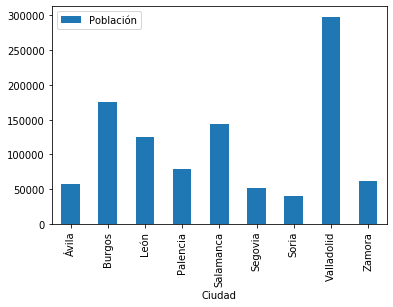

In [30]:
df_ciudades_cyl.plot(kind='bar', y='Población')

#### Y muchas más...